In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 1)Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
# 2)What deck were the passengers on?
# 3)Where did the passengers come from?
# 4)Who was alone and who was with family?
# 5)What factors helped someone servive the sinking of the Titanic?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

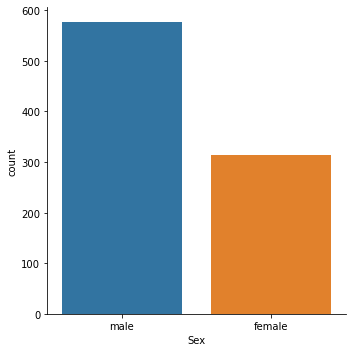

In [30]:
# 1)Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)

sns.catplot(x='Sex',data=titanic_df, kind = 'count')

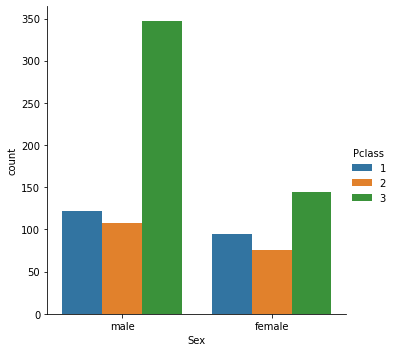

In [12]:
sns.catplot(x='Sex', data= titanic_df, kind= 'count', hue= 'Pclass')

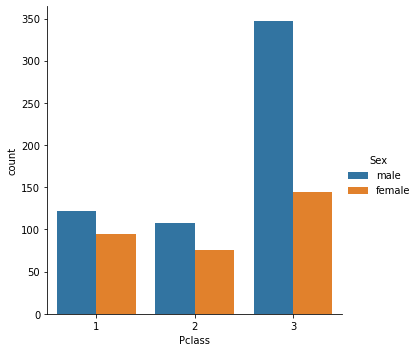

In [13]:
sns.catplot(x='Pclass', data= titanic_df, kind= 'count', hue= 'Sex')

In [14]:
# Create a new column that indicates if the person is a child

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [15]:

titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


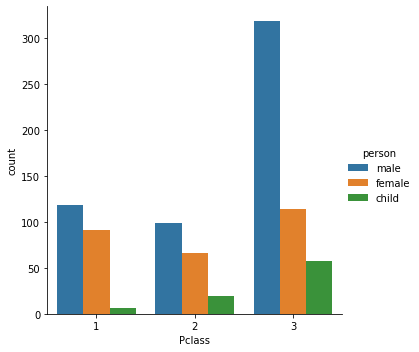

In [17]:
sns.catplot(x='Pclass', data= titanic_df, kind= 'count', hue= 'person')

In [18]:
# Create a distribution of the ages of the passengers

<AxesSubplot:>

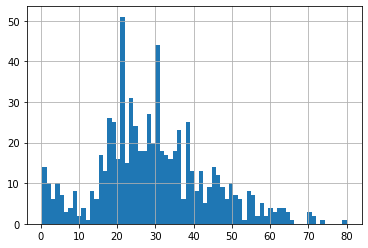

In [20]:
# Histogram of the distribution of the ages of passengers
titanic_df['Age'].hist(bins=70)

In [22]:
# Find the mean age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [25]:
# Count of all males, females, and children under the age of 16
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

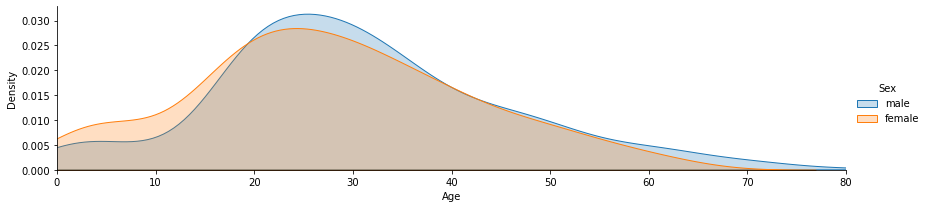

In [26]:
# Does not seperate children
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

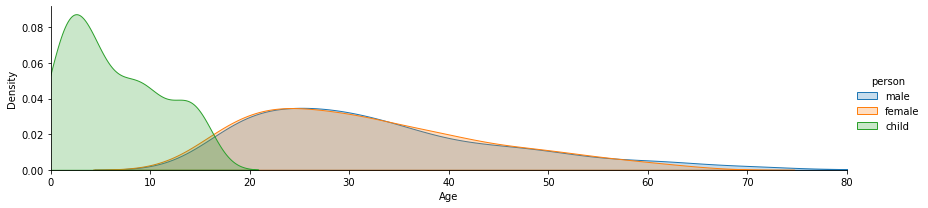

In [27]:
# Children differenciated
fig = sns.FacetGrid(titanic_df, hue='person', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

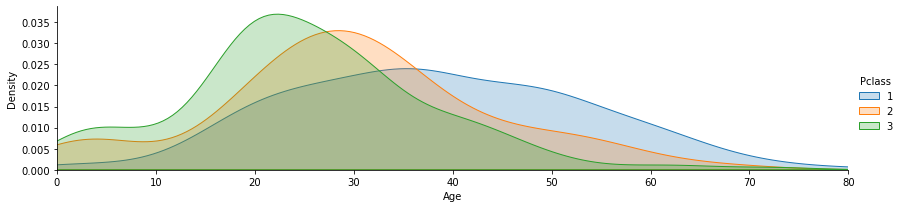

In [29]:
# Set by Class
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [31]:
# 2)What deck were the passengers on?

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [33]:
# Drop null values from Cabin column

deck = titanic_df['Cabin'].dropna()

In [34]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

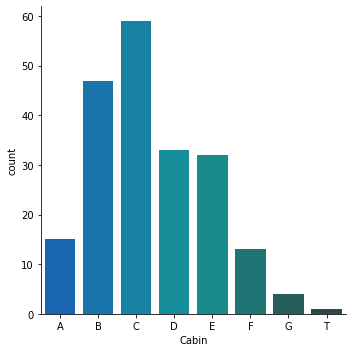

In [94]:
# Grab the first letter of the deck/Cabin identifier (A,B,C,D,E.. etc)

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df.sort_values(by = 'Cabin')

sns.catplot(x='Cabin', data=cabin_df, kind= 'count', palette='winter_d')

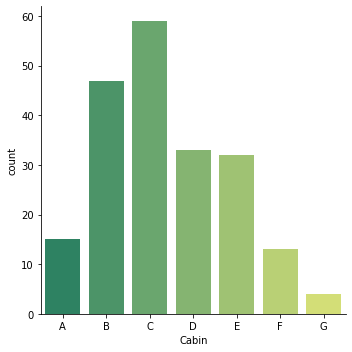

In [96]:
#Drop Cabin T outlier from graph

cabin_df.drop(cabin_df[cabin_df['Cabin']== 'T'].index, inplace=True)

sns.catplot(x='Cabin', data=cabin_df, kind= 'count', palette='summer')



In [60]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [61]:
# 3)Where did the passengers come from?

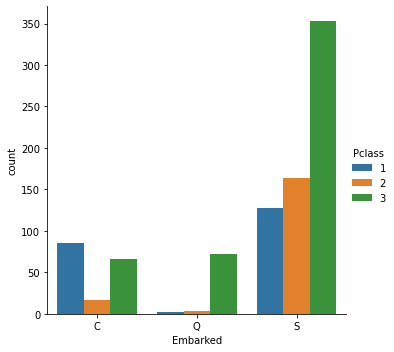

In [66]:
sns.catplot(x='Embarked',kind = 'count', data=titanic_df, hue='Pclass', order=['C', 'Q','S'])

In [67]:
# 4)Who was alone and who was with family?

In [70]:
titanic_df.head()
#SibSP = had siblings onboard
#Parch = Parent or child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [72]:
#Make a new column to define alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


In [73]:
#Any alone value that is not equal to 0 means they had family on board

titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\ellio\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


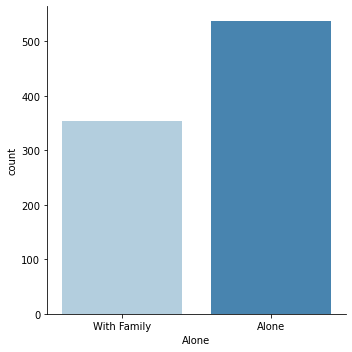

In [76]:
sns.catplot(x='Alone', data=titanic_df, kind= 'count', palette='Blues')

In [77]:
# 5)What factors helped someone servive the sinking of the Titanic?

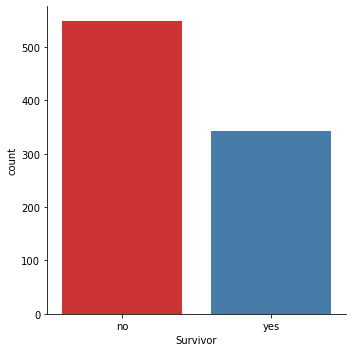

In [80]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

sns.catplot(x='Survivor', data = titanic_df, kind = 'count', palette='Set1')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

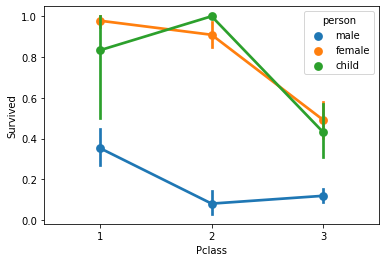

In [86]:
sns.pointplot(x='Pclass',y='Survived', hue = 'person',data= titanic_df, kind='point')

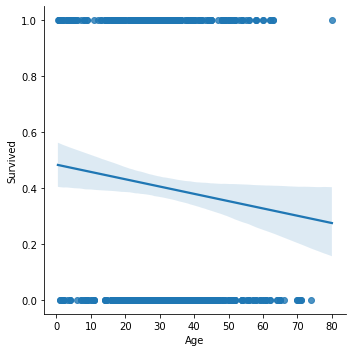

In [88]:
sns.lmplot(x='Age', y='Survived', data=titanic_df)

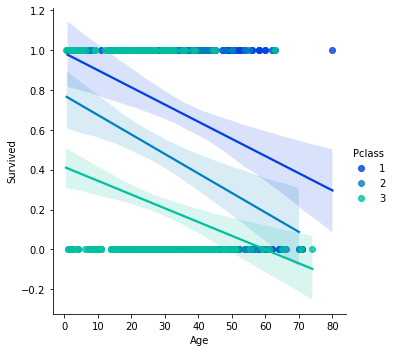

In [89]:
sns.lmplot(x='Age', y='Survived', hue = 'Pclass', data=titanic_df, palette='winter')

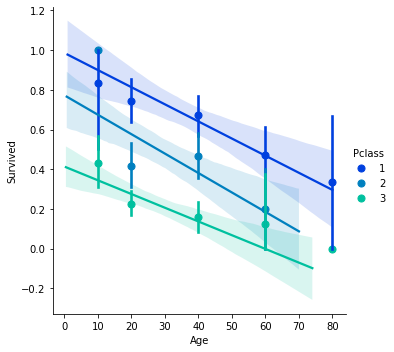

In [90]:
#Bin the ages to get standard devaition, and clean up previous graph
generations = [10,20,40,60,80]

sns.lmplot(x='Age',y='Survived', hue='Pclass',data=titanic_df, palette= 'winter', x_bins= generations)

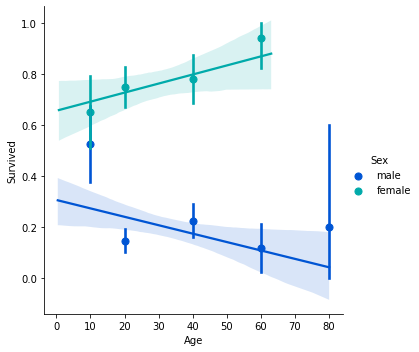

In [91]:
sns.lmplot(x='Age',y='Survived', hue='Sex', data = titanic_df, palette='winter', x_bins=generations)

In [93]:
# 1) Did the deck have an effect on the passengers survival rate? Did this answer math up with your intuition?

# 2) Did having a family member increase the odds of surviving the crash?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [97]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes


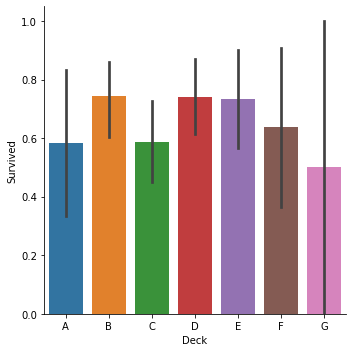

In [100]:
# 1) Did the deck have an effect on the passengers survival rate? Did this answer math up with your intuition?

#Create a new data frame from the original
titanic_df2 = titanic_df

#drop NAN values
titanic_df2.dropna(inplace=True)

#Generate new variable 'Deck' from the Cabin's first letter
titanic_df2['Deck'] = titanic_df2.Cabin.str[0]

#Drop Deck = 'T'
titanic_df2.drop(titanic_df2[titanic_df2['Deck']=='T'].index, inplace=True)

#Barplot showing the survival rate througout the decks
sns.catplot(x='Deck', y='Survived', data= titanic_df2, kind ='bar', order=['A','B','C','D','E','F','G'])


In [101]:
#There does not appear to be a general trend indicating a passenger's deck indicated a higher or lower survival.
# If deck G was mostly 3rd class passengers, it is the only deck indicating a lower survival rating

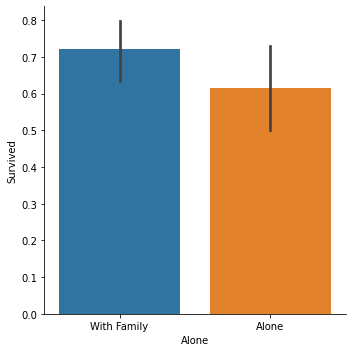

In [106]:
# 2) Did having a family member increase the odds of surviving the crash?

sns.catplot(x='Alone', y='Survived', data= titanic_df, kind='bar')


In [107]:
#It appears that passengers with family survived at a slightly higher volume than passengers without family